 <img src="https://minas.medellin.unal.edu.co/images/noticias/logoUN.gif" alt="logo" width="250"> 

<center> <h2> Examen Parcial E</h2> </center>
<center> <h2> Visión Artificial </h2> </center>
<center> <h2> 2023-1S </h2> </center>


#### Nombre: Jairo Andrés Cortés Roncancio

#### Documento de identidad: cc. 1152715617

## Punto 1 (30%)

### A. (3%)
Tomar una fotografía de un objeto de estudio que se desee identificar o estudiar, leer la imagen en RGB con opencv y mostrar la imagen, asegurándose de que no provenga de un conjunto de datos preexistente.

<img src='./Files/DSC00859.jpg'>


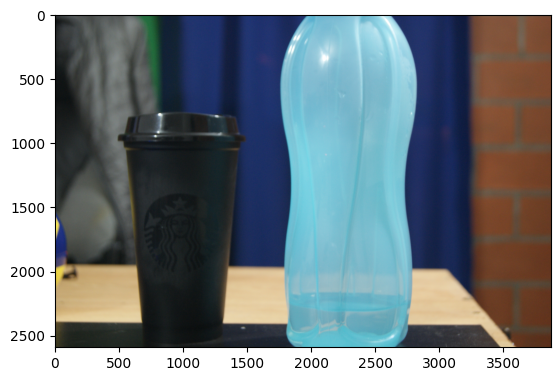

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("Files/DSC00859.jpg", 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### B. (5%)
Describir el entorno en el que se tomó la foto, como la ubicación, las condiciones climáticas y la iluminación. Por ejemplo, la foto se tomó en un jardín local en un día soleado con luz natural. Detallar el tamaño de la imagen (por ejemplo, 1920x1080 píxeles) y su formato (por ejemplo, JPEG, PNG, TIF).


=====================================================================================================================================================
=====================================================================================================================================================

La foto se tomó en la sala de mi casa a las 6 pm con las cortinas cerradas y luz artifical blanca. El tamaño de la foto es de 3872 x 2592 píxeles en jpg

=====================================================================================================================================================
=====================================================================================================================================================

### C. (10%)
Analizar el histograma de la imagen para observar la distribución de las intensidades de los píxeles y su relación con las características visuales del objeto y el entorno.

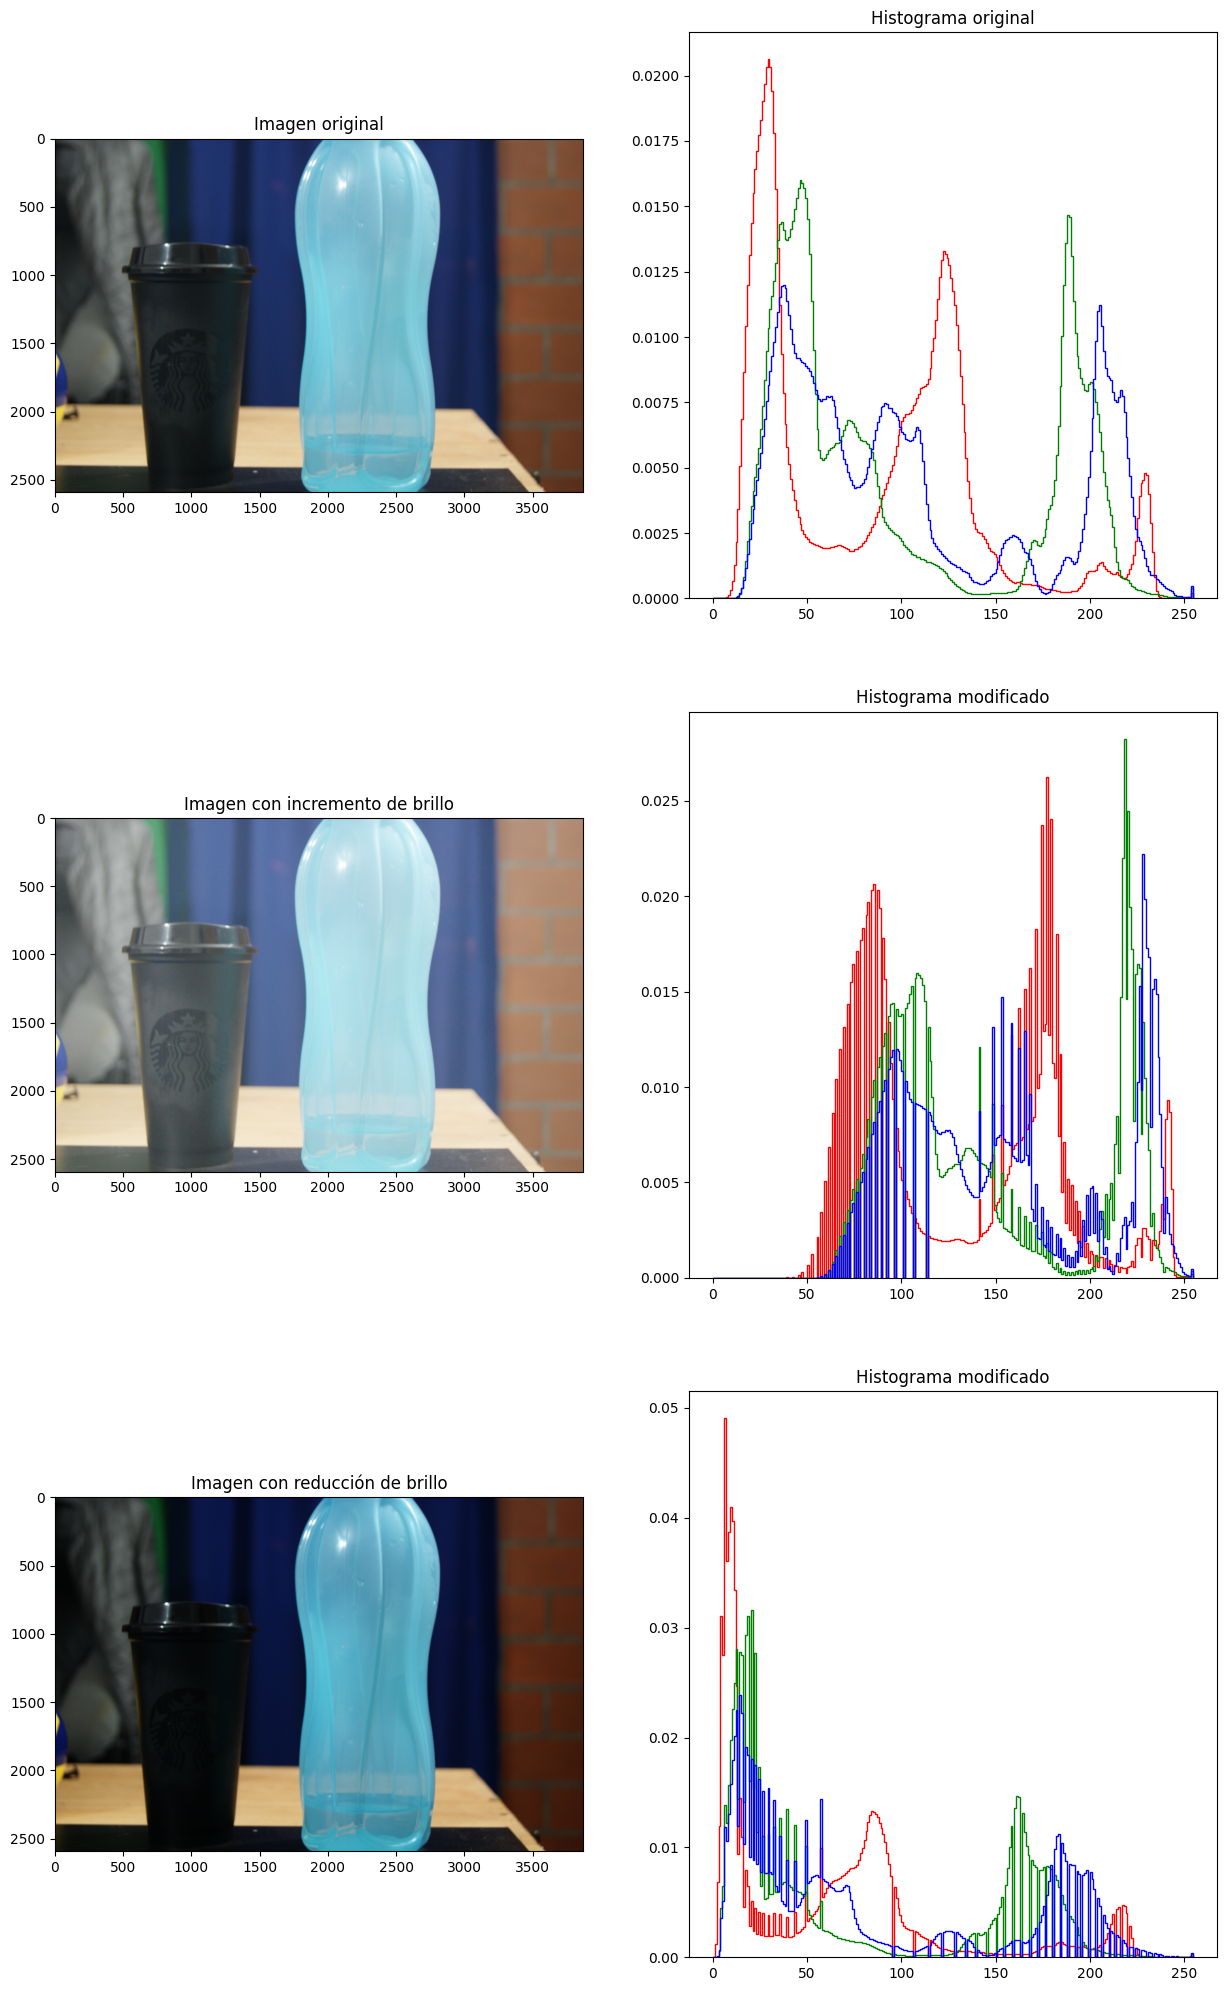

In [13]:
#Importar liberias
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función de transformación de la imagen (corrección gamma)
def gamma_correction(img, a, gamma):
    
    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    #La función corrección gamma es de la forma ax^gamma, donde x es la imagen de entrada
    res_gamma = cv2.pow(img_copy,gamma)
    res = cv2.multiply(res_gamma, a)
    
    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res

#Leer la imagen de entrada
img = cv2.cvtColor(cv2.imread('Files/DSC00859.jpg'), cv2.COLOR_BGR2RGB)

#Dar valor a los parámetros a,gamma (args)
a = 1
gamma = 0.5

#Aplicar la transformación corrección gamma sobre la imagen de entrada
res_brillante = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Variar los parámetros a y gamma y volver a aplicar la corrección
a = 1
gamma = 1.5

res_oscuro = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Generar un subplot 2x2 para contrastar imágen original con transformada y sus histogramas
fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 25))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen con incremento de brillo')
arreglo_plots[1,0].imshow(res_brillante, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_brillante[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])
    
arreglo_plots[2,0].set_title('Imagen con reducción de brillo')
arreglo_plots[2,0].imshow(res_oscuro, cmap="gray")
arreglo_plots[2,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_oscuro[:,:,i].ravel()
    arreglo_plots[2,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

### D. (10%)

Estudiar el espacio de color de la imagen, con el objetivo de identificar en qué canales se puede distinguir mejor el objeto de estudio. Seleccionar los canales de color candidatos donde se identifique mejor el objeto de estudio.


### E. (7%)

Seleccionar el canal de color donde se identifique mejor el objeto de estudio.

# Punto 2 (10%)

Después de seleccionar el canal de color apropiado, realice un análisis de las operaciones unarias disponibles y elija la operación candidata que mejor contribuya a la identificación del objeto de estudio. En caso de que ninguna operación unaria resulte útil para mejorar la identificación del objeto de estudio, justifique esta conclusión, explique por qué las operaciones estudiadas no han sido efectivas y cómo sus efectos en la imagen no han sido suficientes para resaltar las características del objeto.

<b>Ayuda:</b> Use el histograma en el canal seleccionado.

# Punto 3 (15%)

Basándose en los resultados obtenidos en los puntos anteriores, realice un estudio detallado de las transformaciones no lineales, con el objetivo de identificar posibles operaciones que permitan mejorar la detección del objeto de estudio. 

Si encuentra una transformación no lineal que mejora significativamente la identificación del objeto, describa cómo esta transformación contribuye a resaltar sus características y facilita su detección. Explique cómo los ajustes en los parámetros de la transformación seleccionada influyen en el resultado y cómo optimizar estos ajustes para lograr la mayor eficacia en la búsqueda del objeto.

En caso de que ninguna transformación no lineal resulte útil para mejorar la identificación del objeto de estudio, justifique esta conclusión. Explique por qué las transformaciones estudiadas no han sido efectivas y cómo sus efectos en la imagen no han sido suficientes para resaltar las características del objeto.

# Punto 4 (15%)

Evalúe operaciones binarias, para mejorar la detección del objeto en la imagen. Utilice enfoques como imágenes de referencia, imágenes filtradas y máscaras para aplicar estas operaciones y resaltar las características del objeto. Experimente con diferentes operaciones y ajuste los parámetros según sea necesario. Si ninguna operación binaria resulta útil, justifique esta conclusión.

# Punto 5 (10%)

Con su imagen original (sin ninguna modificación), desarrolle el siguiente ejercicio:


Dada la función de transformación no lineal, $F=(X + 1)^{-a}$, donde X representa la imagen de entrada y a es una constante, aplique esta función con a = 3 en formato de escala de grises, muestre con <b>cmap='gray'</b> y  describa el resultado obtenido.

# Punto 6 (20%)

Lea la imagen en formato RGB, y mediante el uso de filtros de convolución, disminuya el ruido de la imagen.


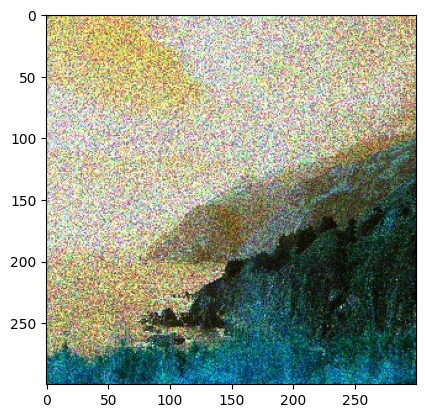

In [4]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

# Puede bajar manualmente la imagen desde el siguiente link.
url = "https://i.ibb.co/YdzKXx2/res6-ruido.jpg"

### IGNORAR ESTE CÓDIGO ###
# Descargue la imagen desde la URL y conviértala en un arreglo de NumPy
with urllib.request.urlopen(url) as url_response:
    image_array = np.asarray(bytearray(url_response.read()), dtype=np.uint8)

# Decodifique el arreglo de NumPy para obtener la imagen en formato BGR
imagen_bgr = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

### TERMINE DE IGNORAR AQUÍ ###

# Convierta la imagen de formato BGR a RGB 
rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(rgb)

---

# ¿Cómo enviar el parcial resuelto? 

Para entregar el parcial resuelto, siga los siguientes pasos:

1. Asegúrese de ejecutar todas las celdas en su cuaderno Jupyter, de manera que todos los resultados y gráficos estén actualizados.
<br></br>
2. Guarde el cuaderno Jupyter para conservar los cambios realizados.
<br></br>
3. Reúna todas las imágenes de referencia utilizadas en el cuaderno Jupyter en una sola carpeta.
<br></br>
4. Comprima el cuaderno Jupyter y la carpeta de imágenes en un archivo ZIP/RAR o comprimido. Asegúrese de que el archivo comprimido contenga tanto el cuaderno como las imágenes de referencia.
<br></br>
5. Envíe el archivo ZIP/RAR comprimido como respuesta al correo electrónico en el que se envió el parcial. No olvide incluir al monitor en copia (dbrito@unal.edu.co) al enviar su respuesta.

Al seguir estos pasos, garantizará que el profesor y el monitor reciban su parcial resuelto junto con las imágenes de referencia utilizadas en su cuaderno Jupyter.

<b> Plazo para enviar el parcial: </b> Viernes 24 de marzo del 2023, antes de las 23:59.